<a href="https://colab.research.google.com/github/emily0622/Python-Projects/blob/main/Visualizing_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of the project is to help visualize how the K-Means clustering algorithm identifies the cluster centroids and how the results are not always optimal

Many datasets don't have a gorund truth--meaning they don't have a set answer. In this example we will practice using a dataset with predefined categories. This project will be based on the BCG matrix which is a common business analysis tool comparing the relative market share of companies and market growth rate.

In [84]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report, f1_score, jaccard_similarity_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

np.random.seed()


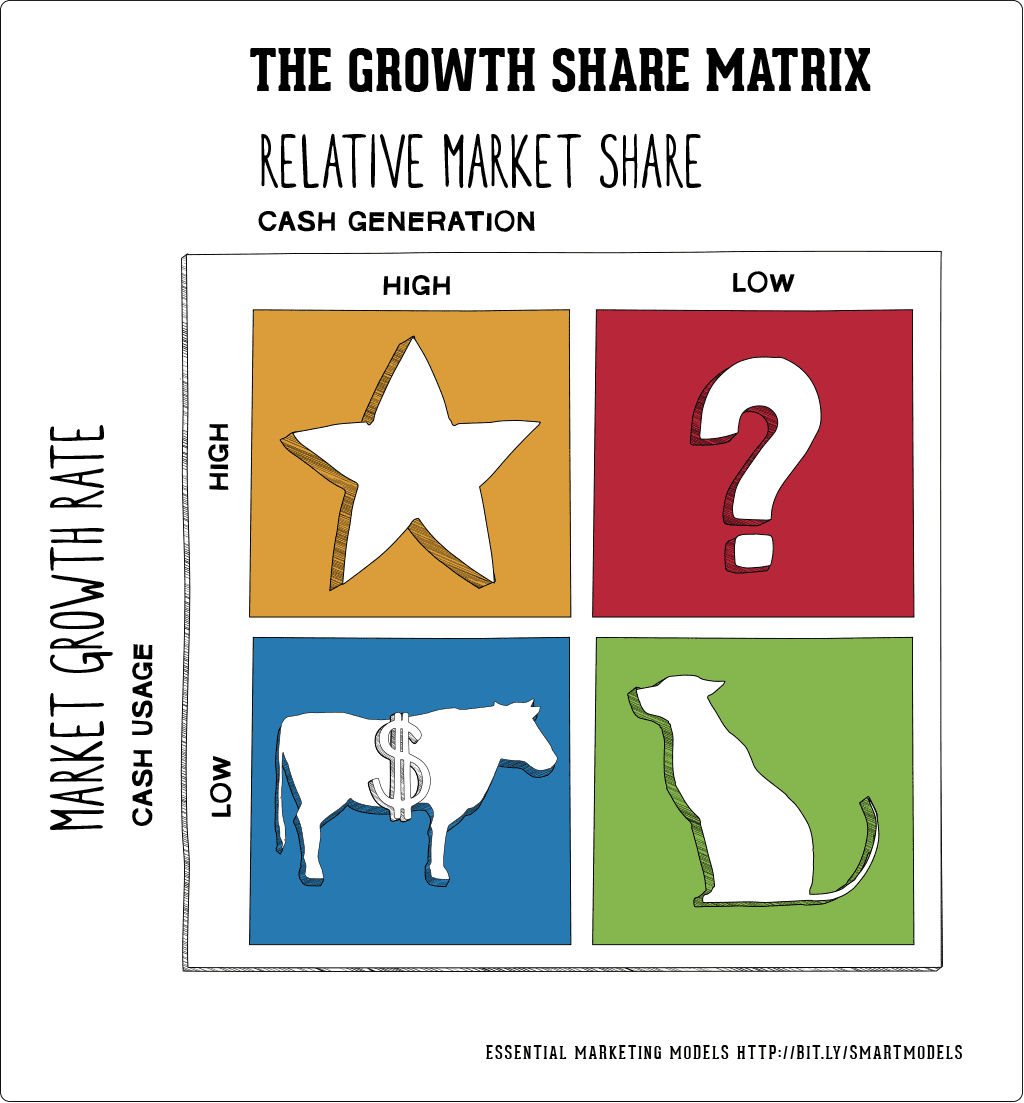

Text(0.5, 1.0, 'BCG Matrix Dataset')

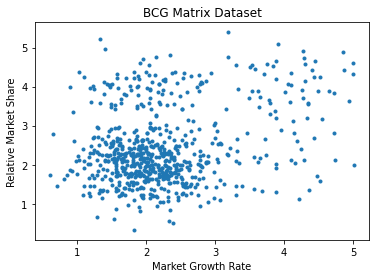

In [68]:
X, y = make_blobs(n_samples=[500,30,50,100], centers=[[2,2], [4,2], [4,4], [2,4]], cluster_std=0.5)


plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.xlabel("Market Growth Rate")
plt.ylabel("Relative Market Share")
plt.title("BCG Matrix Dataset")

In this generated dataset we assigned different numbers of companies in each category. We assumed that there is a large number of cash cows (which include companies like P&G), a few fast rising companies (like Zoom), a few more companies with high growth but low market share which includes startups, and dogs which are companies losing their market value.

Lets look at how K-Means identifies clusters without knowing the centroids ([2,2],[4,2],[4,4],2,4]), but assuming there are 4 clusters

In [46]:
Number_of_clusters = 4
k_means = KMeans(init = "k-means++", n_clusters = Number_of_clusters, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)


[0 0 1 0 2 1 1 0 3 1 0 0 1 1 3 1 0 1 0 1 0 1 3 0 0 1 0 1 2 0 2 0 1 3 0 0 0
 0 2 3 0 1 3 0 2 3 3 0 3 3 1 1 2 0 1 0 2 0 0 3 0 3 0 0 2 1 0 1 2 3 2 1 1 0
 3 0 1 0 1 0 3 1 0 1 1 3 1 1 1 1 1 1 1 1 0 2 0 3 0 0 0 3 0 3 0 0 1 1 0 1 0
 0 1 0 0 1 2 3 1 3 3 1 0 1 2 0 0 1 3 2 0 0 3 0 0 1 0 3 1 0 1 1 0 0 2 3 0 0
 1 1 3 2 1 2 0 1 1 1 0 0 0 0 1 1 0 3 1 2 1 3 0 3 0 3 0 1 1 3 0 2 3 3 0 1 1
 0 1 0 0 1 3 3 0 2 3 0 1 0 3 0 0 1 1 2 1 0 1 0 3 1 1 1 3 3 0 2 1 3 1 0 0 3
 0 1 0 0 1 1 3 0 0 1 0 0 0 3 1 0 1 1 1 3 3 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 3
 0 1 0 2 1 1 3 1 2 1 3 1 1 0 0 1 1 0 0 0 3 3 2 2 0 0 0 3 0 3 0 3 1 2 0 2 1
 0 1 0 0 1 3 3 2 3 0 1 0 0 1 3 0 1 3 0 0 0 1 0 0 3 0 3 0 0 1 1 0 0 1 3 2 0
 0 3 0 1 0 1 0 0 0 2 3 3 1 1 0 0 3 0 3 1 0 0 1 1 1 1 3 1 1 0 0 1 1 1 2 1 3
 2 1 2 3 0 0 1 2 0 1 3 0 3 3 3 3 1 0 1 1 1 1 0 3 0 1 1 0 0 0 3 0 1 1 2 3 1
 1 0 0 1 0 3 0 0 0 0 1 0 0 3 3 0 0 1 3 0 1 2 0 2 3 1 0 3 0 1 0 1 0 2 1 0 0
 0 2 0 0 3 0 0 1 0 3 1 2 0 0 1 0 3 0 0 0 1 2 0 1 1 3 0 0 1 0 0 0 0 3 2 0 1
 0 0 3 3 1 1 1 0 2 2 0 0 

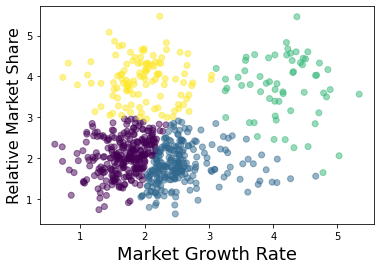

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Market Growth Rate', fontsize=18)
plt.ylabel('Relative Market Share', fontsize=16)

plt.show()



Lets analyze the accuracy using a confusion martix

TypeError: ignored

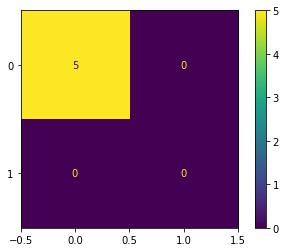

In [87]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
cnf_m = confusion_matrix(y,labels,labels=[2,4])
disp = ConfusionMatrixDisplay(cnf_m, display_labels=None)
disp.plot()